## Import

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Datanın toplanması
Dataset asteroidlər haqqındadı. Mənbə olaraq "NASA" nın "api" ı istifadə olunub.
Bütün datalar API dan json formatında alınıb və dataframe formatına cevrilib

In [2]:
List = []


def fetch(page):
    from nasa_key import key
    # nasa_key python file ı 6 key arasında random select edir və 1 key seçir.
    # NASA api 1 saat ərzində 1 key'dən maks 1000 request atmağa icazə verdiyi üçün belə bir ehtiyac yaranır
    import requests
    import time
    url = f'http://www.neowsapp.com/rest/v1/neo/browse?page={page}&size=20&api_key={key}'
    params = {'key': 'value'}
    r = requests.get(url=url, params=params)
    dict_ = dict(r.json())

    try:
        for ch_dict in dict_['near_earth_objects']:
            List.append(ch_dict)
    except KeyError:
        print(KeyError)


In [3]:
import threading

arr = [*range(0, 1470, 40)]
length = [*range(1470)]
i = 0
while True:
    all_threads = []
    try:
        for e in length[arr[i]:arr[i + 1]]:
            thread = threading.Thread(target=fetch, args=(e,))
            all_threads.append(thread)

        for thread in all_threads:
            thread.start()

        for thread in all_threads:
            thread.join()

        i += 1
    except:
        for e in length[arr[i]:]:
            thread = threading.Thread(target=fetch, args=(e,))
            all_threads.append(thread)

        for thread in all_threads:
            thread.start()

        for thread in all_threads:
            thread.join()
        break


In [4]:
len(List)

29364

In [5]:
pprint(List[0])

{'absolute_magnitude_h': 16.42,
 'close_approach_data': [{'close_approach_date': '1900-10-05',
                          'close_approach_date_full': '1900-Oct-05 21:19',
                          'epoch_date_close_approach': -2184979260000,
                          'miss_distance': {'astronomical': '0.3958718837',
                                            'kilometers': '59221590.594407719',
                                            'lunar': '153.9941627593',
                                            'miles': '36798590.0220717622'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '45235.7998937946',
                                                'kilometers_per_second': '12.5654999705',
                                                'miles_per_hour': '28107.7668840081'}},
                         {'close_approach_date': '1904-09-04',
                          'close_approach_date_full': '1904-Sep-04 14:5

In [6]:
# for i in List[0]['orbital_data']:
#     text = f"data_dict['{i}'].append(dict_['orbital_data']['{i}'])".strip()
#     print(text)

In [7]:
# for i in List[0]['orbital_data']['orbit_class']:
#     text = f"data_dict['{i}'].append(dict_['orbital_data']['orbit_class']['{i}'])".strip()
#     print(text)

In [8]:
# # array yaratma copy
# for i in List[0]['orbital_data']:
#     print(f'{i} = np.array([])'.strip())

In [9]:
data_dict = {
    'id': [],
    'name': [],
    'close_approach_date': [],
    'close_approach_date_full': [],
    'epoch_date_close_approach': [],
    'orbiting_body': [],
    'astronomical_miss_distance': [],
    'kilometers_miss_distance': [],
    'lunar_miss_distance': [],
    'miles_miss_distance': [],
    'absolute_magnitude_h': [],
    'relative_velocity_kilometers_per_hour': [],
    'relative_velocity_kilometers_per_second': [],
    'relative_velocity_miles_per_hour': [],
    'estimated_diameter_max_km': [],
    'estimated_diameter_min_km': [],
    'is_potentially_hazardous_asteroid': [],
    'is_sentry_object': [],
    'nasa_jpl_url': [],
    'neo_reference_id': [],
    'orbit_id': [],
    'orbit_determination_date': [],
    'first_observation_date': [],
    'last_observation_date': [],
    'data_arc_in_days': [],
    'observations_used': [],
    'orbit_uncertainty': [],
    'minimum_orbit_intersection': [],
    'jupiter_tisserand_invariant': [],
    'epoch_osculation': [],
    'eccentricity': [],
    'semi_major_axis': [],
    'inclination': [],
    'ascending_node_longitude': [],
    'orbital_period': [],
    'perihelion_distance': [],
    'perihelion_argument': [],
    'aphelion_distance': [],
    'perihelion_time': [],
    'mean_anomaly': [],
    'mean_motion': [],
    'equinox': [],
    'orbit_class_type': [],
    'orbit_class_description': [],
    'orbit_class_range': [],
}

In [10]:
errors = []
for dict_ in List:
    if len(dict_['close_approach_data']) == 0:
        continue

    try:

        data_dict['absolute_magnitude_h'].append(dict_['absolute_magnitude_h'])
        data_dict['id'].append(dict_['id'])
        data_dict['neo_reference_id'].append(dict_['neo_reference_id'])
        data_dict['nasa_jpl_url'].append(dict_['nasa_jpl_url'])
        data_dict['is_sentry_object'].append(dict_['is_sentry_object'])
        data_dict['is_potentially_hazardous_asteroid'].append(dict_['is_potentially_hazardous_asteroid'])
        data_dict['name'].append(dict_['name'])

        data_dict['estimated_diameter_min_km'].append(
            dict_['estimated_diameter']['kilometers']['estimated_diameter_min'])
        data_dict['estimated_diameter_max_km'].append(
            dict_['estimated_diameter']['kilometers']['estimated_diameter_max'])

        #close_approach_data
        for c_dict in dict_['close_approach_data'][
                      -len(dict_['close_approach_data']) // 2 - 4: len(dict_['close_approach_data'])]:
            data_dict['close_approach_date'].append(c_dict['close_approach_date'])
            data_dict['close_approach_date_full'].append(c_dict['close_approach_date_full'])
            data_dict['epoch_date_close_approach'].append(c_dict['epoch_date_close_approach'])
            data_dict['orbiting_body'].append(c_dict['orbiting_body'])
            data_dict['astronomical_miss_distance'].append(c_dict['miss_distance']['astronomical'])
            data_dict['kilometers_miss_distance'].append(c_dict['miss_distance']['kilometers'])
            data_dict['lunar_miss_distance'].append(c_dict['miss_distance']['lunar'])
            data_dict['miles_miss_distance'].append(c_dict['miss_distance']['miles'])
            data_dict['relative_velocity_kilometers_per_hour'].append(
                c_dict['relative_velocity']['kilometers_per_hour'])
            data_dict['relative_velocity_kilometers_per_second'].append(
                c_dict['relative_velocity']['kilometers_per_second'])
            data_dict['relative_velocity_miles_per_hour'].append(c_dict['relative_velocity']['miles_per_hour'])
            break

        # orbital_data
        data_dict['orbit_id'].append(dict_['orbital_data']['orbit_id'])
        data_dict['orbit_determination_date'].append(dict_['orbital_data']['orbit_determination_date'])
        data_dict['first_observation_date'].append(dict_['orbital_data']['first_observation_date'])
        data_dict['last_observation_date'].append(dict_['orbital_data']['last_observation_date'])
        data_dict['data_arc_in_days'].append(dict_['orbital_data']['data_arc_in_days'])
        data_dict['observations_used'].append(dict_['orbital_data']['observations_used'])
        data_dict['orbit_uncertainty'].append(dict_['orbital_data']['orbit_uncertainty'])
        data_dict['minimum_orbit_intersection'].append(dict_['orbital_data']['minimum_orbit_intersection'])
        data_dict['jupiter_tisserand_invariant'].append(dict_['orbital_data']['jupiter_tisserand_invariant'])
        data_dict['epoch_osculation'].append(dict_['orbital_data']['epoch_osculation'])
        data_dict['eccentricity'].append(dict_['orbital_data']['eccentricity'])
        data_dict['semi_major_axis'].append(dict_['orbital_data']['semi_major_axis'])
        data_dict['inclination'].append(dict_['orbital_data']['inclination'])
        data_dict['ascending_node_longitude'].append(dict_['orbital_data']['ascending_node_longitude'])
        data_dict['orbital_period'].append(dict_['orbital_data']['orbital_period'])
        data_dict['perihelion_distance'].append(dict_['orbital_data']['perihelion_distance'])
        data_dict['perihelion_argument'].append(dict_['orbital_data']['perihelion_argument'])
        data_dict['aphelion_distance'].append(dict_['orbital_data']['aphelion_distance'])
        data_dict['perihelion_time'].append(dict_['orbital_data']['perihelion_time'])
        data_dict['mean_anomaly'].append(dict_['orbital_data']['mean_anomaly'])
        data_dict['mean_motion'].append(dict_['orbital_data']['mean_motion'])
        data_dict['equinox'].append(dict_['orbital_data']['equinox'])
        # Orbit class
        data_dict['orbit_class_type'].append(dict_['orbital_data']['orbit_class']['orbit_class_type'])
        data_dict['orbit_class_description'].append(dict_['orbital_data']['orbit_class']['orbit_class_description'])
        data_dict['orbit_class_range'].append(dict_['orbital_data']['orbit_class']['orbit_class_range'])
    except:
        errors.append(dict_)
        continue

In [11]:
for key, value in data_dict.items():
    print(f'{key}: {len(value)}')

id: 28645
name: 28645
close_approach_date: 28645
close_approach_date_full: 28645
epoch_date_close_approach: 28645
orbiting_body: 28645
astronomical_miss_distance: 28645
kilometers_miss_distance: 28645
lunar_miss_distance: 28645
miles_miss_distance: 28645
absolute_magnitude_h: 28645
relative_velocity_kilometers_per_hour: 28645
relative_velocity_kilometers_per_second: 28645
relative_velocity_miles_per_hour: 28645
estimated_diameter_max_km: 28645
estimated_diameter_min_km: 28645
is_potentially_hazardous_asteroid: 28645
is_sentry_object: 28645
nasa_jpl_url: 28645
neo_reference_id: 28645
orbit_id: 28645
orbit_determination_date: 28645
first_observation_date: 28645
last_observation_date: 28645
data_arc_in_days: 28645
observations_used: 28645
orbit_uncertainty: 28645
minimum_orbit_intersection: 28645
jupiter_tisserand_invariant: 28645
epoch_osculation: 28645
eccentricity: 28645
semi_major_axis: 28645
inclination: 28645
ascending_node_longitude: 28645
orbital_period: 28645
perihelion_distance:

In [12]:
data = pd.DataFrame(data_dict)

In [13]:
data.head()

,id,name,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,astronomical_miss_distance,kilometers_miss_distance,lunar_miss_distance,miles_miss_distance,...,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,equinox,orbit_class_type,orbit_class_description,orbit_class_range
0,2159923,159923 (2004 YJ32),1900-10-05,1900-Oct-05 21:19,-2184979260000,Earth,0.3958718837,59221590.594407719,153.9941627593,36798590.0220717622,...,1.200001161302366,234.2256432791436,3.847613667174178,2458941.916222606460,161.8940116673756,.2458214387060964,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2159928,159928 (2005 CV69),2022-08-16,2022-Aug-16 19:05,1660676700000,Earth,0.2238852542,33492757.152728554,87.0913638838,20811434.2556758852,...,.9609955743971028,95.64392668778822,2.347854505692643,2459747.105447731300,292.0978476608899,.4631625453889132,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
2,2159929,159929 (2005 UK),1976-05-01,1976-May-01 22:56,199839360000,Earth,0.1372957546,20539152.448202702,53.4080485394,12762437.5292212076,...,1.117901888225954,19.44180068101909,2.654902043690104,2459953.721960310621,225.6305901327084,.3804106906295631,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
3,2161989,161989 Cacus (1978 CA),2035-09-21,2035-Sep-21 23:35,2074030500000,Earth,0.4652296306,69597361.798646822,180.9743263034,43245795.2875052636,...,.882861594056069,102.1843909911963,1.363435795474164,2459757.155634063921,230.283803023928,.8280340362552354,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
4,2161995,161995 (1983 LB),1945-06-19,1945-Jun-19 05:40,-774296400000,Earth,0.3742188571,55982343.935994377,145.5711354119,34785815.4821293226,...,1.190809945562284,220.7128425271394,3.381815542159351,2459446.223997734201,43.9844326842214,.2851022326106264,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


In [14]:
data.shape

(28645, 45)

In [18]:
data.to_csv('asteroids.csv', index=False, encoding='utf_8_sig')

## Datanın təmizlənməsi

In [4]:
data = pd.read_csv('asteroids.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28645 entries, 0 to 28644
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_                                      28645 non-null  int64  
 1   name                                     28645 non-null  object 
 2   close_approach_date                      28645 non-null  object 
 3   close_approach_date_full                 28645 non-null  object 
 4   epoch_date_close_approach                28645 non-null  float64
 5   orbiting_body                            28645 non-null  object 
 6   astronomical_miss_distance               28645 non-null  float64
 7   kilometers_miss_distance                 28645 non-null  float64
 8   lunar_miss_distance                      28645 non-null  float64
 9   miles_miss_distance                      28645 non-null  float64
 10  absolute_magnitude_h                     28645

In [6]:
data.select_dtypes(include='boolean').head()

,is_potentially_hazardous_asteroid,is_sentry_object
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False


In [7]:
bool_types = data.select_dtypes(include='boolean').columns

In [8]:
# True, False --> 1, 0
data[bool_types] = data[bool_types].astype(int)

In [9]:
# rename target var
data.rename(columns={"is_potentially_hazardous_asteroid": 'hazardous'}, inplace=True)

In [10]:
# name id
data['name'] = data['name'].apply(lambda x: x.split()[0])

In [11]:
data['orbit_class_description'] = data['orbit_class_description']

Text(0.5, 1.0, 'Equinox')

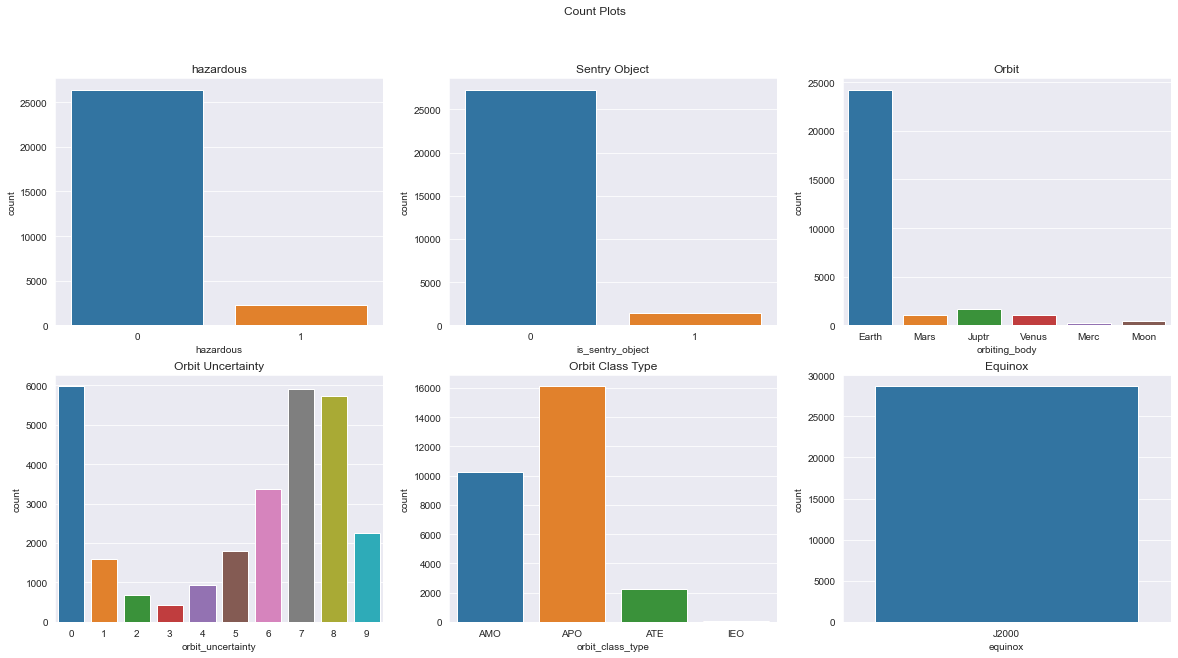

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Count Plots')

sns.countplot(ax=axes[0, 0], x=data['hazardous'])
axes[0, 0].set_title('hazardous')

sns.countplot(ax=axes[0, 1], x=data['is_sentry_object'])
axes[0, 1].set_title('Sentry Object')

sns.countplot(ax=axes[0, 2], x=data['orbiting_body'])
axes[0, 2].set_title('Orbit')

sns.countplot(ax=axes[1, 0], x=data['orbit_uncertainty'])
axes[1, 0].set_title('Orbit Uncertainty')

sns.countplot(ax=axes[1, 1], x=data['orbit_class_type'])
axes[1, 1].set_title('Orbit Class Type')

sns.countplot(ax=axes[1, 2], x=data['equinox'])
axes[1, 2].set_title('Equinox')

In [13]:
data.head()

,id_,name,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,astronomical_miss_distance,kilometers_miss_distance,lunar_miss_distance,miles_miss_distance,absolute_magnitude_h,relative_velocity_kilometers_per_hour,relative_velocity_kilometers_per_second,relative_velocity_miles_per_hour,estimated_diameter_max_km,estimated_diameter_min_km,hazardous,is_sentry_object,nasa_jpl_url,neo_reference_id,orbit_id,orbit_determination_date,first_observation_date,last_observation_date,data_arc_in_days,observations_used,orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,equinox,orbit_class_type,orbit_class_description,orbit_class_range
0,2159923,159923,10/5/1900,1900-Oct-05 21:19,-2.184980e+12,Earth,0.395872,59221590.59,153.994163,36798590.02,16.42,45235.79989,12.565500,28107.76688,3.090580,1.382149,0,0,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2159923,2159923,98,2/27/2022 5:25,1/15/1997,2/26/2022,9173.0,330,0,0.223369,3.237,2459600.5,0.524527,2.523807,7.524552,118.731614,1464.477638,1.200001,234.225643,3.847614,2458941.916,161.894012,0.245821,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2159928,159928,8/16/2022,2022-Aug-16 19:05,1.660680e+12,Earth,0.223885,33492757.15,87.091364,20811434.26,18.05,63921.26425,17.755907,39718.18778,1.458949,0.652462,0,0,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2159928,2159928,139,4/9/2022 5:52,3/20/1988,4/8/2022,12437.0,880,0,0.220473,4.051,2459600.5,0.419136,1.654425,27.752527,157.477411,777.264923,0.960996,95.643927,2.347855,2459747.105,292.097848,0.463163,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
2,2159929,159929,5/1/1976,1976-May-01 22:56,1.998390e+11,Earth,0.137296,20539152.45,53.408049,12762437.53,17.83,104806.97110,29.113048,65122.97599,1.614507,0.722030,0,0,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2159929,2159929,72,12/31/2021 4:52,3/30/1976,11/19/2021,16670.0,331,0,0.128154,3.398,2459600.5,0.407389,1.886402,54.435383,222.561187,946.345644,1.117902,19.441801,2.654902,2459953.722,225.630590,0.380411,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
3,2161989,161989,9/21/2035,2035-Sep-21 23:35,2.074030e+12,Earth,0.465230,69597361.80,180.974326,43245795.29,17.33,87452.25309,24.292293,54339.42915,2.032544,0.908981,1,0,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2161989,2161989,203,4/2/2022 5:52,2/8/1978,4/1/2022,16123.0,1202,0,0.016353,5.448,2459600.5,0.213941,1.123149,26.061857,161.228442,434.764737,0.882862,102.184391,1.363436,2459757.156,230.283803,0.828034,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
4,2161995,161995,6/19/1945,1945-Jun-19 05:40,-7.742960e+11,Earth,0.374219,55982343.94,145.571135,34785815.48,17.34,62823.69684,17.451027,39036.20207,2.023205,0.904805,0,0,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2161995,2161995,111,12/24/2021 4:52,6/13/1983,8/1/2021,13929.0,451,0,0.246176,3.328,2459600.5,0.479157,2.286313,25.271369,81.173993,1262.704949,1.190810,220.712842,3.381816,2459446.224,43.984433,0.285102,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


In [16]:
cols_to_drop = ['id_', 'name', 'close_approach_date', 'close_approach_date_full', 'nasa_jpl_url',
                'orbit_determination_date', 'first_observation_date', 'last_observation_date',
                'orbit_class_description', 'orbit_class_range', 'equinox']

In [17]:
data.drop(cols_to_drop, axis=1, inplace=True)

In [18]:
data.head()

,epoch_date_close_approach,orbiting_body,astronomical_miss_distance,kilometers_miss_distance,lunar_miss_distance,miles_miss_distance,absolute_magnitude_h,relative_velocity_kilometers_per_hour,relative_velocity_kilometers_per_second,relative_velocity_miles_per_hour,estimated_diameter_max_km,estimated_diameter_min_km,hazardous,is_sentry_object,neo_reference_id,orbit_id,data_arc_in_days,observations_used,orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,orbit_class_type
0,-2.184980e+12,Earth,0.395872,59221590.59,153.994163,36798590.02,16.42,45235.79989,12.565500,28107.76688,3.090580,1.382149,0,0,2159923,98,9173.0,330,0,0.223369,3.237,2459600.5,0.524527,2.523807,7.524552,118.731614,1464.477638,1.200001,234.225643,3.847614,2458941.916,161.894012,0.245821,AMO
1,1.660680e+12,Earth,0.223885,33492757.15,87.091364,20811434.26,18.05,63921.26425,17.755907,39718.18778,1.458949,0.652462,0,0,2159928,139,12437.0,880,0,0.220473,4.051,2459600.5,0.419136,1.654425,27.752527,157.477411,777.264923,0.960996,95.643927,2.347855,2459747.105,292.097848,0.463163,APO
2,1.998390e+11,Earth,0.137296,20539152.45,53.408049,12762437.53,17.83,104806.97110,29.113048,65122.97599,1.614507,0.722030,0,0,2159929,72,16670.0,331,0,0.128154,3.398,2459600.5,0.407389,1.886402,54.435383,222.561187,946.345644,1.117902,19.441801,2.654902,2459953.722,225.630590,0.380411,AMO
3,2.074030e+12,Earth,0.465230,69597361.80,180.974326,43245795.29,17.33,87452.25309,24.292293,54339.42915,2.032544,0.908981,1,0,2161989,203,16123.0,1202,0,0.016353,5.448,2459600.5,0.213941,1.123149,26.061857,161.228442,434.764737,0.882862,102.184391,1.363436,2459757.156,230.283803,0.828034,APO
4,-7.742960e+11,Earth,0.374219,55982343.94,145.571135,34785815.48,17.34,62823.69684,17.451027,39036.20207,2.023205,0.904805,0,0,2161995,111,13929.0,451,0,0.246176,3.328,2459600.5,0.479157,2.286313,25.271369,81.173993,1262.704949,1.190810,220.712842,3.381816,2459446.224,43.984433,0.285102,AMO


<AxesSubplot:>

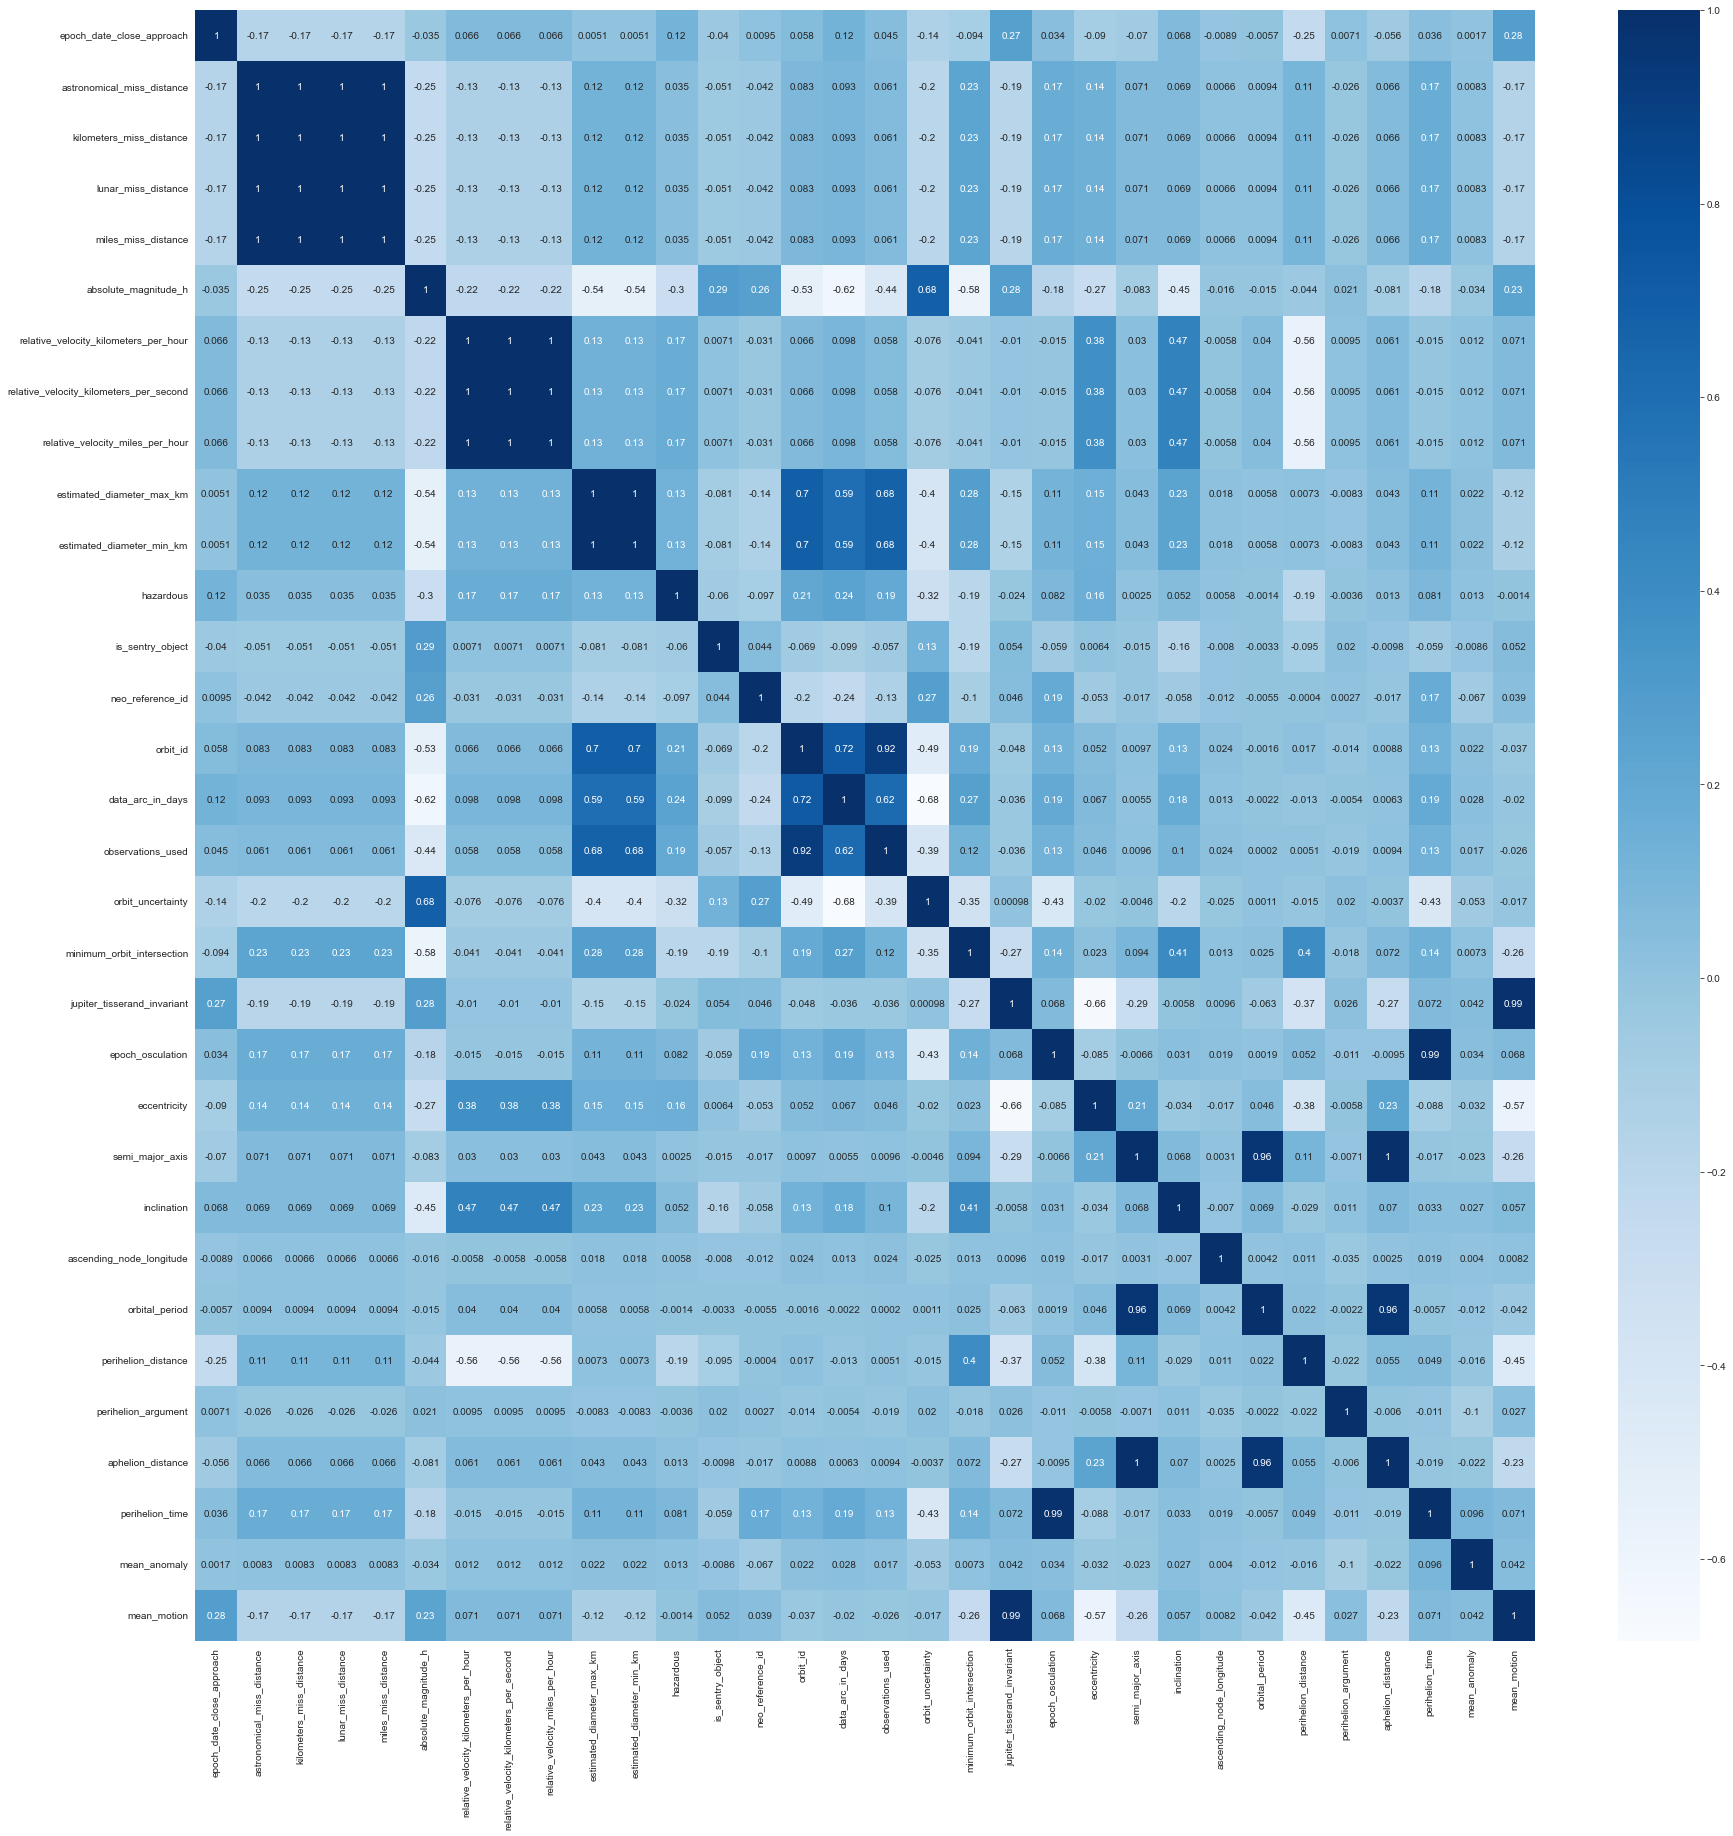

In [19]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [20]:
data = pd.concat([pd.get_dummies(data), pd.get_dummies(data.orbit_uncertainty, prefix='orbit_uncertainty')], axis=1)

In [21]:
data.head()

,epoch_date_close_approach,astronomical_miss_distance,kilometers_miss_distance,lunar_miss_distance,miles_miss_distance,absolute_magnitude_h,relative_velocity_kilometers_per_hour,relative_velocity_kilometers_per_second,relative_velocity_miles_per_hour,estimated_diameter_max_km,estimated_diameter_min_km,hazardous,is_sentry_object,neo_reference_id,orbit_id,data_arc_in_days,observations_used,orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,orbiting_body_Earth,orbiting_body_Juptr,orbiting_body_Mars,orbiting_body_Merc,orbiting_body_Moon,orbiting_body_Venus,orbit_class_type_AMO,orbit_class_type_APO,orbit_class_type_ATE,orbit_class_type_IEO,orbit_uncertainty_0,orbit_uncertainty_1,orbit_uncertainty_2,orbit_uncertainty_3,orbit_uncertainty_4,orbit_uncertainty_5,orbit_uncertainty_6,orbit_uncertainty_7,orbit_uncertainty_8,orbit_uncertainty_9
0,-2.184980e+12,0.395872,59221590.59,153.994163,36798590.02,16.42,45235.79989,12.565500,28107.76688,3.090580,1.382149,0,0,2159923,98,9173.0,330,0,0.223369,3.237,2459600.5,0.524527,2.523807,7.524552,118.731614,1464.477638,1.200001,234.225643,3.847614,2458941.916,161.894012,0.245821,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.660680e+12,0.223885,33492757.15,87.091364,20811434.26,18.05,63921.26425,17.755907,39718.18778,1.458949,0.652462,0,0,2159928,139,12437.0,880,0,0.220473,4.051,2459600.5,0.419136,1.654425,27.752527,157.477411,777.264923,0.960996,95.643927,2.347855,2459747.105,292.097848,0.463163,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1.998390e+11,0.137296,20539152.45,53.408049,12762437.53,17.83,104806.97110,29.113048,65122.97599,1.614507,0.722030,0,0,2159929,72,16670.0,331,0,0.128154,3.398,2459600.5,0.407389,1.886402,54.435383,222.561187,946.345644,1.117902,19.441801,2.654902,2459953.722,225.630590,0.380411,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2.074030e+12,0.465230,69597361.80,180.974326,43245795.29,17.33,87452.25309,24.292293,54339.42915,2.032544,0.908981,1,0,2161989,203,16123.0,1202,0,0.016353,5.448,2459600.5,0.213941,1.123149,26.061857,161.228442,434.764737,0.882862,102.184391,1.363436,2459757.156,230.283803,0.828034,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,-7.742960e+11,0.374219,55982343.94,145.571135,34785815.48,17.34,62823.69684,17.451027,39036.20207,2.023205,0.904805,0,0,2161995,111,13929.0,451,0,0.246176,3.328,2459600.5,0.479157,2.286313,25.271369,81.173993,1262.704949,1.190810,220.712842,3.381816,2459446.224,43.984433,0.285102,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
cor = data.corr()
strong_cors = dict(cor['hazardous'][abs(cor['hazardous']) >= 0.2])
strong_cors

{'absolute_magnitude_h': -0.304327715481237,
 'hazardous': 1.0,
 'orbit_id': 0.20974390052702882,
 'data_arc_in_days': 0.24397977786491265,
 'orbit_uncertainty': -0.3155010469506901,
 'orbit_uncertainty_0': 0.29254044949472385}

In [23]:
data.dropna(inplace=True)

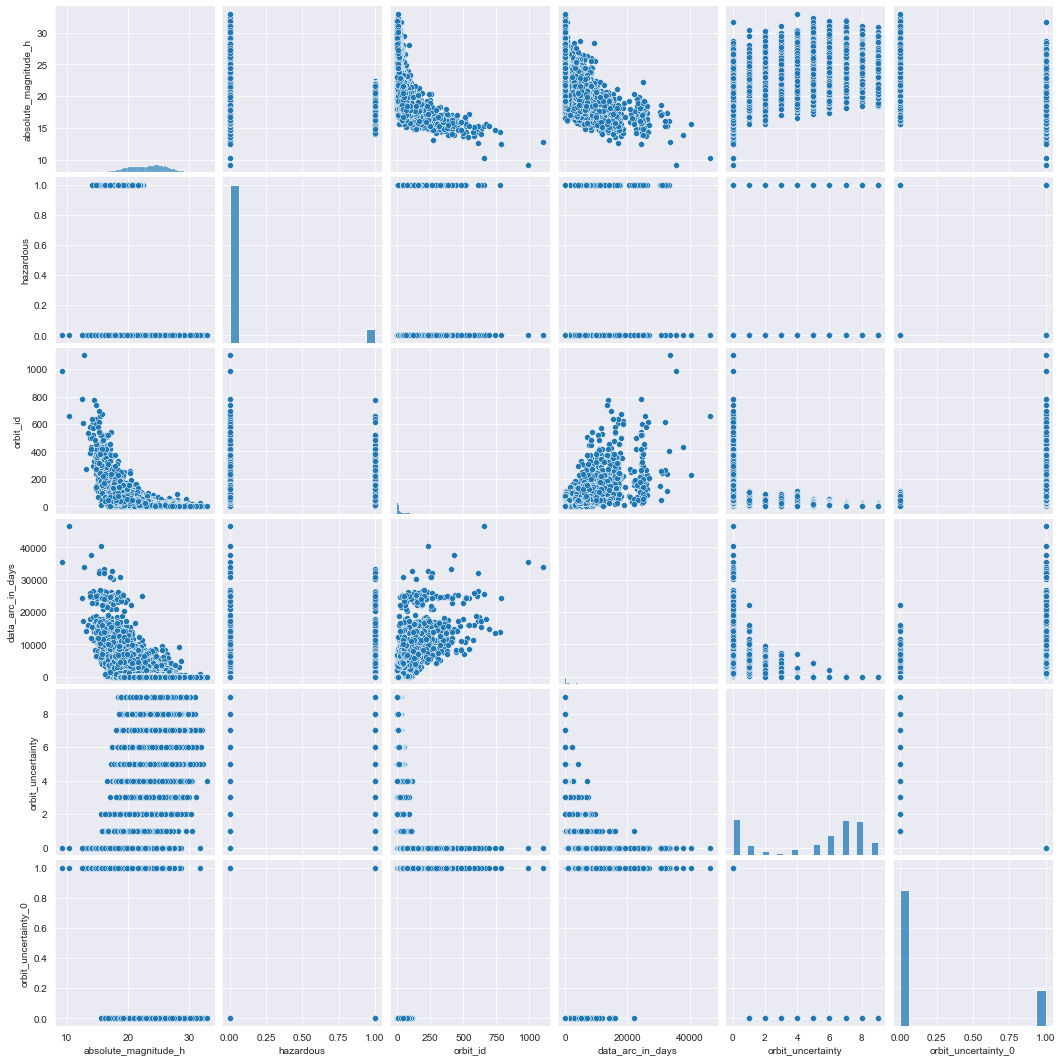

In [24]:
sns.pairplot(data=data[strong_cors.keys()])

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


class Pipeline(GridSearchCV):

    def __init__(self, data, target, estimator, params=None, scaler=None):
        self.target = target
        self.data = data
        self.estimator = estimator
        self.scaler = scaler
        self.params = params
        self.X = data.drop(target, axis=1)
        self.y = data[target]
        GridSearchCV.__init__(self, self.estimator, param_grid=self.params, n_jobs=-1)

    def train_test_split(self, X, y, random_state, test_size):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y,
                                                                                random_state=random_state,
                                                                                test_size=test_size)

    def scale(self):
        class NotDefined(Exception):
            pass

        try:
            self.X_train = pd.DataFrame(self.scaler.fit_transform(self.X_train))
            self.X_test = pd.DataFrame(self.scaler.transform(self.X_test))
        except:
            raise NotDefined('Scaler is not defined')

    def run(self, report=False, matrix=False, score=False):
        self.train_test_split(self.X, self.y, 15, 0.25)
        self.scale()
        self.model = self.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        if report:
            self.report()
        if matrix:
            self.matrix()
        if score:
            self.score()

    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    def report(self):
        print(55 * '_', '\n', ''f'{20 * " "}|Classification Report|', '\n\n',
              classification_report(self.y_test, self.y_pred), '\n',
              55 * '_')

    def matrix(self):
        print(f'{20 * " "}|Confusion Matrix|', '\n\n', confusion_matrix(self.y_test, self.y_pred), '\n',
              55 * '_')

    def score(self):
        print(f'{20 * " "}|Accuracy Score|', '\n\n', accuracy_score(self.y_test, self.y_pred), '\n',
              55 * '_')

    def feature_importance(self):
        plot_importance(self.model)
        plt.show()

In [26]:
rf_params = {
    'n_estimators': [100, 500, 800, 1000],
}

xgb_params = {
    'alpha': [5, 10, 100]
}

knn_params = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'leaf_size': [20, 30, 40, 50]
}

In [27]:
pipe = Pipeline(data, 'hazardous', estimator=RandomForestClassifier(), params=rf_params,
                scaler=RobustScaler())
pipe2 = Pipeline(data, 'hazardous', estimator=XGBClassifier(), params=xgb_params,
                 scaler=RobustScaler())
pipe3 = Pipeline(data, 'hazardous', estimator=KNeighborsClassifier(), params=knn_params,
                 scaler=RobustScaler())

In [28]:
pipe.run(report=True, matrix=True, score=True)

_______________________________________________________ 
                     |Classification Report| 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6567
           1       0.99      0.99      0.99       544

    accuracy                           1.00      7111
   macro avg       1.00      1.00      1.00      7111
weighted avg       1.00      1.00      1.00      7111
 
 _______________________________________________________
                    |Confusion Matrix| 

 [[6562    5]
 [   5  539]] 
 _______________________________________________________
                    |Accuracy Score| 

 0.9985937280270004 
 _______________________________________________________


In [29]:
pipe2.run(matrix=True, report=True, score=True)

_______________________________________________________ 
                     |Classification Report| 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6567
           1       0.99      0.98      0.99       544

    accuracy                           1.00      7111
   macro avg       1.00      0.99      0.99      7111
weighted avg       1.00      1.00      1.00      7111
 
 _______________________________________________________
                    |Confusion Matrix| 

 [[6563    4]
 [   9  535]] 
 _______________________________________________________
                    |Accuracy Score| 

 0.9981718464351006 
 _______________________________________________________


In [30]:
pipe3.run(matrix=True, report=True, score=True)

_______________________________________________________ 
                     |Classification Report| 

               precision    recall  f1-score   support

           0       0.94      0.99      0.97      6567
           1       0.66      0.28      0.39       544

    accuracy                           0.93      7111
   macro avg       0.80      0.63      0.68      7111
weighted avg       0.92      0.93      0.92      7111
 
 _______________________________________________________
                    |Confusion Matrix| 

 [[6491   76]
 [ 394  150]] 
 _______________________________________________________
                    |Accuracy Score| 

 0.9339052172690199 
 _______________________________________________________


#### Train data metrics

In [31]:
print(classification_report(pipe3.y_train, pipe3.predict(pipe3.X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     19600
           1       0.81      0.40      0.53      1732

    accuracy                           0.94     21332
   macro avg       0.88      0.70      0.75     21332
weighted avg       0.94      0.94      0.93     21332



In [32]:
print(classification_report(pipe2.y_train, pipe2.predict(pipe2.X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19600
           1       1.00      0.99      1.00      1732

    accuracy                           1.00     21332
   macro avg       1.00      1.00      1.00     21332
weighted avg       1.00      1.00      1.00     21332



In [33]:
print(classification_report(pipe.y_train, pipe.predict(pipe.X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19600
           1       1.00      1.00      1.00      1732

    accuracy                           1.00     21332
   macro avg       1.00      1.00      1.00     21332
weighted avg       1.00      1.00      1.00     21332



Hər 3 halda normal olaraq Train data üçün nəticələr daha yaxşıdı